# RNN

순환 뉴런

- 각 타임 스텝마다 순환 뉴런은 물론 x와 이전 타임 스텝의 출력인 y를 입력으로 받음
- 첫 번째 타임 스텝에서는 이전 출력이 없으므로 일반적으로 0으로 설정함.
- 아래와 같이 오른쪽처럼 시간을 축으로 표현하여 펼칠 수 있는데 이를 **시간에 따라 네트워크를 펼쳤다** 라고 함.

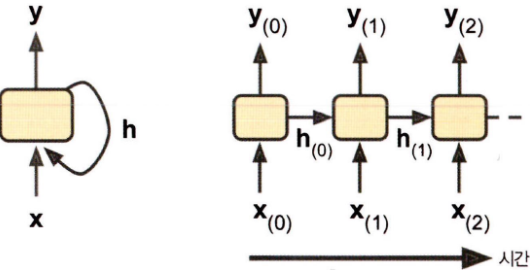

In [ ]:
import numpy as np

timesteps = 10
input_size = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_size))
hidden_state_t = np.zeros((hidden_size,))
print(inputs)
print(hidden_state_t)

Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))



[[0.8495859  0.88401828 0.48537778 0.02222454]
 [0.04962635 0.24310541 0.1144617  0.69259906]
 [0.51499247 0.54914537 0.69895149 0.27140181]
 [0.66647625 0.07959183 0.17121138 0.62718425]
 [0.82999414 0.92136527 0.29529445 0.6567728 ]
 [0.39008899 0.98060501 0.51904266 0.08211817]
 [0.24886634 0.41348209 0.78806011 0.92276946]
 [0.8427839  0.76819323 0.63290798 0.18103519]
 [0.06154986 0.93789658 0.8949442  0.28798862]
 [0.12706107 0.74911573 0.98718917 0.53477877]]
[0. 0. 0. 0. 0. 0. 0. 0.]
(8, 4)
(8, 8)
(8,)


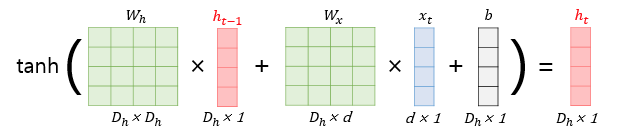

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.9999726  0.99996817 0.99993979 0.99999826 0.99977411 0.99997067
  0.99999911 0.99997916]
 [0.99993867 0.99994098 0.99976127 0.99999269 0.99891599 0.99990769
  0.99999536 0.99998674]
 [0.99996674 0.99997503 0.99993274 0.99999713 0.99971816 0.99997151
  0.99999823 0.99998414]
 [0.99995015 0.99994003 0.99977331 0.99999571 0.99932692 0.99994267
  0.99999786 0.99998617]
 [0.9999905  0.99998654 0.99993813 0.99999945 0.99980642 0.99998753
  0.99999972 0.99999142]
 [0.99996939 0.99997208 0.99994269 0.9999975  0.9997052  0.999963
  0.99999843 0.99998059]
 [0.99998551 0.99999131 0.99993993 0.99999858 0.99975456 0.99998819
  0.99999897 0.99999372]
 [0.99997814 0.99997837 0.99994732 0.99999857 0.9998119  0.9999803
  0.99999923 0.99998385]
 [0.9999782  0.99998815 0.99996484 0.9999978  0.99978118 0.99997997
  0.99999824 0.99998704]
 [0.99998367 0.99999185 0.99996526 0.99999836 0.99981261 0.99998726
  0.99999869 0.99999082]]


In [ ]:
import torch
import torch.nn as nn

input_size = 5
hidden_size = 8

inputs = torch.Tensor(1, 10, 5) #(batch_size, time_steps, input_size)
cell = nn.RNN(input_size, hidden_size, batch_first = True)
outputs, _status = cell(inputs)

print(outputs, _status)

tensor([[[-0.0924, -0.3200, -0.0330,  0.0835,  0.2585,  0.4109,  0.0457,
          -0.3007],
         [-0.0767, -0.3221, -0.3046,  0.4212,  0.2137,  0.3475,  0.1431,
          -0.3496],
         [ 0.0375, -0.1830, -0.2349,  0.4574,  0.1781,  0.3719,  0.2626,
          -0.3341],
         [ 0.0036, -0.1554, -0.1533,  0.3515,  0.1897,  0.3822,  0.2207,
          -0.3527],
         [-0.0091, -0.2076, -0.1720,  0.3428,  0.1967,  0.3905,  0.1756,
          -0.3516],
         [-0.0042, -0.2089, -0.2020,  0.3785,  0.1974,  0.3785,  0.1888,
          -0.3444],
         [ 0.0015, -0.1925, -0.1934,  0.3805,  0.1949,  0.3783,  0.2050,
          -0.3457],
         [-0.0011, -0.1924, -0.1840,  0.3684,  0.1946,  0.3818,  0.1997,
          -0.3482],
         [-0.0025, -0.1981, -0.1871,  0.3683,  0.1954,  0.3820,  0.1945,
          -0.3476],
         [-0.0017, -0.1978, -0.1902,  0.3723,  0.1955,  0.3807,  0.1965,
          -0.3468]]], grad_fn=<TransposeBackward1>) tensor([[[-0.0017, -0.1978, -0.1902,  

In [ ]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size=8, num_layers = 2, batch_first=True)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


In [22]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first= True, bidirectional=True)
outputs, _status = cell(inputs)
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


# LSTM

# attention mechanism

- 기존 seq2seq 한계는 고정된 크기로 압축해야합니다. 
- 디코더가 context vector를 매번 참고하면 이전의 한계점을 어느정도 해결할 수는 있음.

=> 해결방안: 매번 소스 문장에서의 출력 전부를 입력으로 받으면 됨
=> 디코더는 인코더의 모든 출력을 참고한다.  (에너지, 가중치)

# 트랜스포머

동작 원리
- 인코더와 디코더

- 어텐션: scaled dot-product attention (query, key, value)

ex) i am a teacher (i: query, i am a teacher각각: key, 가중치: value) 